In [20]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
#from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
%matplotlib inline
sns.set_style("darkgrid")

In [21]:
#Reading the data from csv.file
crimes_data = pd.read_csv('crime.csv')

In [22]:
#Checking the data contents
crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11893156,JC511208,12/24/2018 11:30:00 PM,032XX W CONGRESS PKWY,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,...,28.0,27.0,06,NaN,NaN,2018,11/17/2019 03:53:23 PM,NaN,NaN,NaN
1,11893345,JC512903,09/18/2018 09:00:00 AM,014XX W 86TH ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,21.0,71.0,26,NaN,NaN,2018,11/17/2019 03:53:23 PM,NaN,NaN,NaN
2,11416092,JB395922,08/16/2018 12:39:00 PM,031XX N KOLMAR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,31.0,20.0,05,1145501.0,1920490.0,2018,11/17/2019 03:50:04 PM,41.937823,-87.740668,"(41.937823144, -87.740668115)"
3,11892573,JC511642,11/22/2018 09:38:00 AM,065XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,20.0,42.0,11,NaN,NaN,2018,11/16/2019 03:49:16 PM,NaN,NaN,NaN
4,11892405,JC511459,11/14/2018 12:01:00 AM,037XX N SOUTHPORT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,44.0,6.0,11,NaN,NaN,2018,11/16/2019 03:49:16 PM,NaN,NaN,NaN


In [23]:
#Handling any inconsistensis of column names
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [24]:
#Checking the data for any null values and its datatypes
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491007 entries, 0 to 491006
Data columns (total 22 columns):
id                      491007 non-null int64
case_number             491007 non-null object
date                    491007 non-null object
block                   491007 non-null object
iucr                    491007 non-null object
primary_type            491007 non-null object
description             491007 non-null object
location_description    489263 non-null object
arrest                  491007 non-null bool
domestic                491007 non-null bool
beat                    491007 non-null int64
district                491007 non-null int64
ward                    490992 non-null float64
community_area          491003 non-null float64
fbi_code                491007 non-null object
x_coordinate            485613 non-null float64
y_coordinate            485613 non-null float64
year                    491007 non-null int64
updated_on              491007 non-null object


In [25]:
#Check the data forany duplicates
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [26]:
# Removing Primary key type attriburtes as they of no use for any type of analysis, Location columns is just a 
# combination of Latitude and Longitude
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)

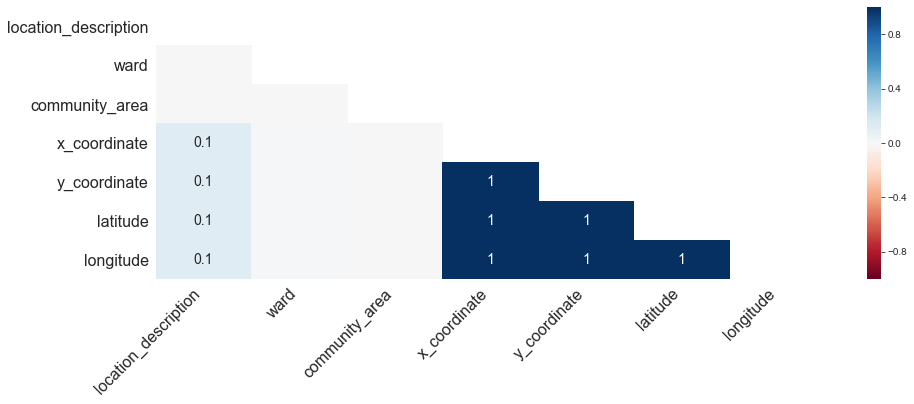

In [27]:
msno.heatmap(crimes_data,figsize=(15, 5))

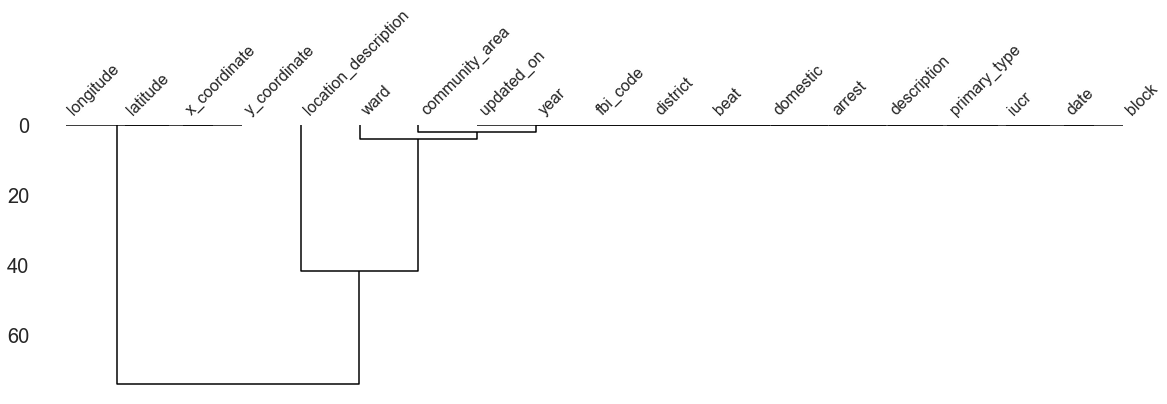

In [28]:
msno.dendrogram(crimes_data,figsize=(20,5))

As we can see from the above heatmap and dendogram that, the null values of latitude and longitude are highly co-ordinated with the x_coordinate and y_coordianate values respectively. A a co-relation of 1 here indicates that if any one of the value is missing the other one is also missing.

So we can safely remove observations where one of the values is zero. This should'nt affect our data and also limit the dropping of important observations.

In [29]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1744
arrest                     0
domestic                   0
beat                       0
district                   0
ward                      15
community_area             4
fbi_code                   0
x_coordinate            5394
y_coordinate            5394
year                       0
updated_on                 0
latitude                5394
longitude               5394
dtype: int64

In [30]:
#Dropping observations where latitude is null/Nan
crimes_data.dropna(subset=['latitude'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

There are some data with ward and commnity_area missing, since they are very few in number we can go ahead and delete it

In [31]:
crimes_data.isnull().sum()

date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1363
arrest                     0
domestic                   0
beat                       0
district                   0
ward                      12
community_area             4
fbi_code                   0
x_coordinate               0
y_coordinate               0
year                       0
updated_on                 0
latitude                   0
longitude                  0
dtype: int64

In [32]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [33]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484234 entries, 0 to 484233
Data columns (total 19 columns):
date                    484234 non-null object
block                   484234 non-null object
iucr                    484234 non-null object
primary_type            484234 non-null object
description             484234 non-null object
location_description    484234 non-null object
arrest                  484234 non-null bool
domestic                484234 non-null bool
beat                    484234 non-null int64
district                484234 non-null int64
ward                    484234 non-null float64
community_area          484234 non-null float64
fbi_code                484234 non-null object
x_coordinate            484234 non-null float64
y_coordinate            484234 non-null float64
year                    484234 non-null int64
updated_on              484234 non-null object
latitude                484234 non-null float64
longitude               484234 non-null float

We ended up removing up around 6773 rows out of the 491007 rows, there are very low chances that we missed important observations. After handling all the NULL entries we ended up with a dataset of size 484234 . Which is still a better value for our analysis

In [34]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [35]:
#Mapping similar crimes under one group.
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [36]:
#Zone where the crime has occured
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [37]:
#Mapping seasons from month of crime
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [38]:
#Mapping similar locations of crime under one group.
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [39]:
#Mapping crimes to ints to get better information from plots
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [40]:
#Grouping the data into years = (2018 and 2019) for analyzing
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]

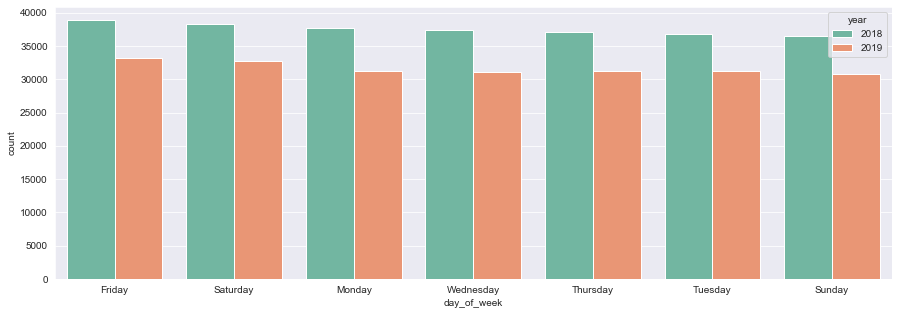

In [41]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

From the above plot we can see that the day of the week has very little influence on the crime, it seems like almost everyday the crimes count were the same.
But when it comes to 2018 and 2019 we can see that the number of crimes are less in 2019 than in 2018

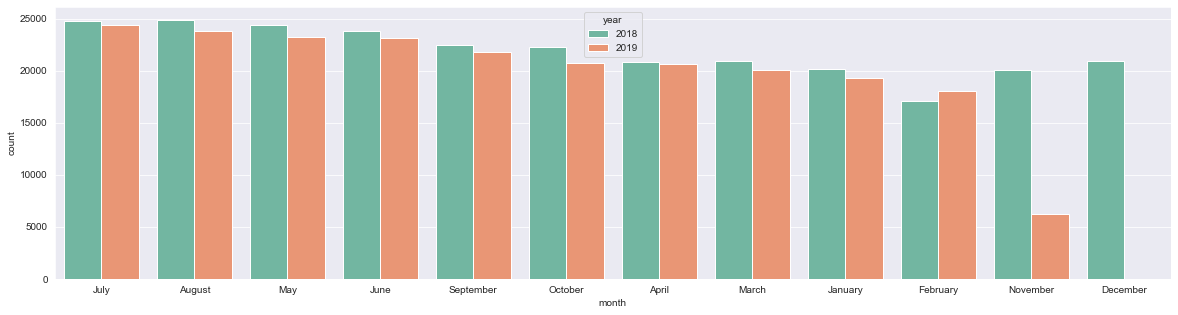

In [42]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

From the above plot we can see that May, June, July and August are the months were there are huge crime rates.
One thing is also to be noted here is that for the year 2019 there is no value for December is 0 since we dont have the data available yet and also november data is also very limited.
During February,January and November the crimes are less compared. It looks like the crime rate were low in winter's where people hardly come out of the houses.

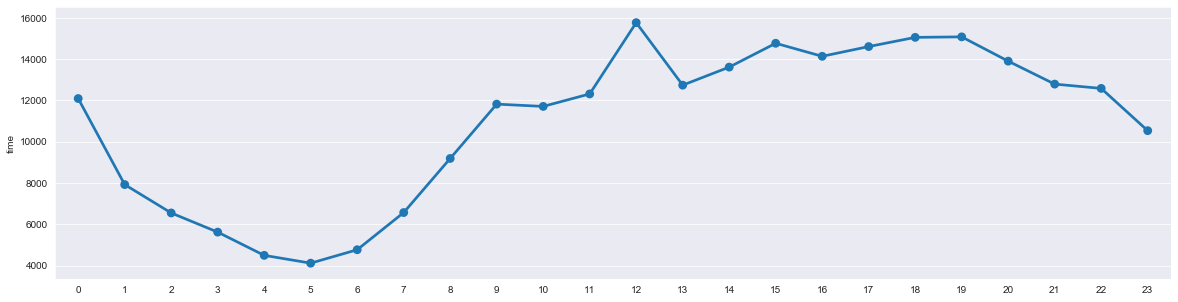

In [43]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2018,x=crimes_data_2018.time.value_counts().index,y=crimes_data_2018.time.value_counts())

The above plot gives the crimes that happened by hour of the day for the year 2018. Around midnight we can see there are a lot of crimes happening and it decreses gradually. There is a spike at 12 in the morning. We need to analyze more looking at the data as to why its happening. The crimes are also more around the evening.

We can see a similar trend in the year 2019 as well.

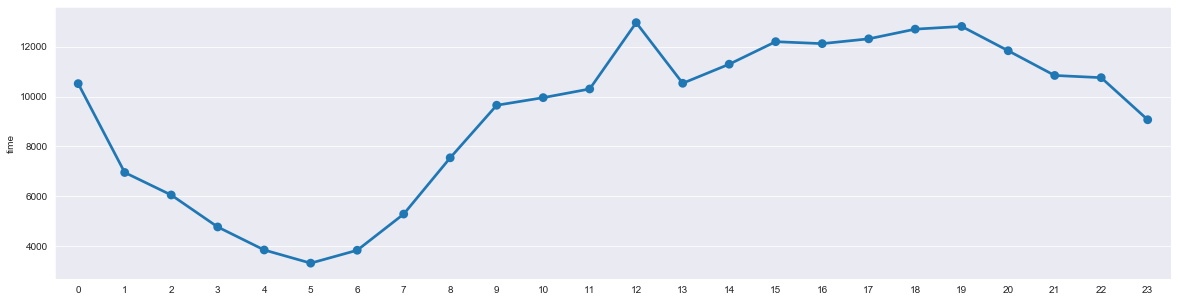

In [44]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2019,x=crimes_data_2019.time.value_counts().index,y=crimes_data_2019.time.value_counts())

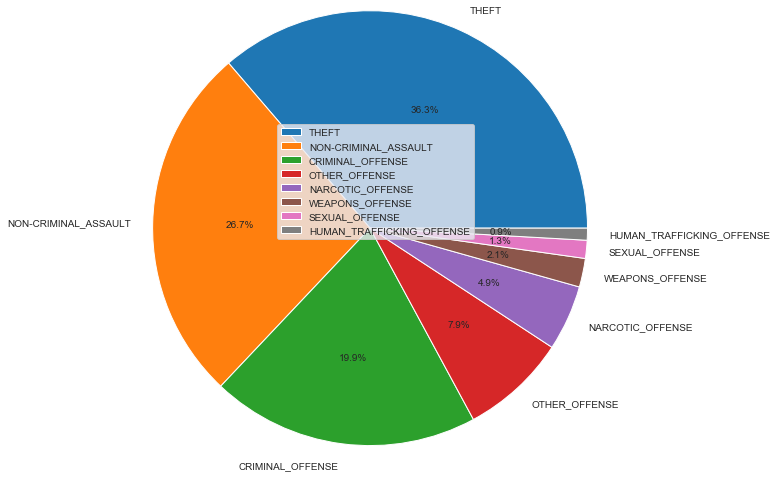

In [45]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.primary_type_grouped.value_counts(),labels=crimes_data_2018.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

By looking at the pie charts, we can see that there are a lot of Thefts and Non- Criminal Assault that happeened in the year 2019, there were very less sexual and weapons offence.
Theft and Non-Criminal Offence consitituted about 50% of the offence's

There is a same trend in the year 2019 as well, but the Thefts were a bit reduced but the count of the Non-Criminal Offence went up

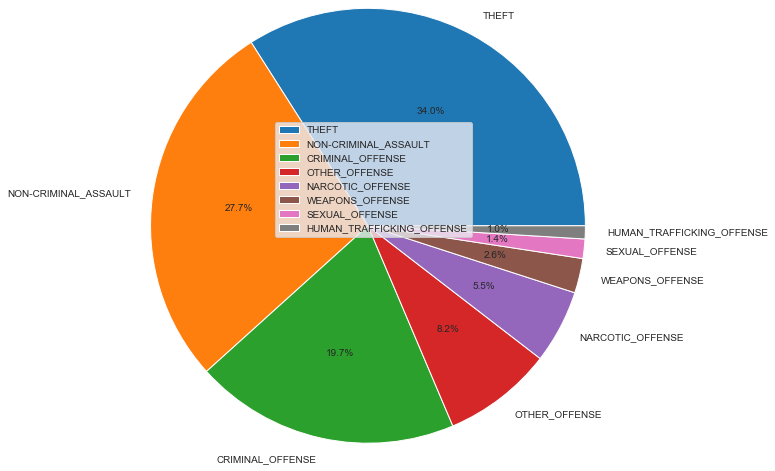

In [46]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2019.primary_type_grouped.value_counts(),labels=crimes_data_2019.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

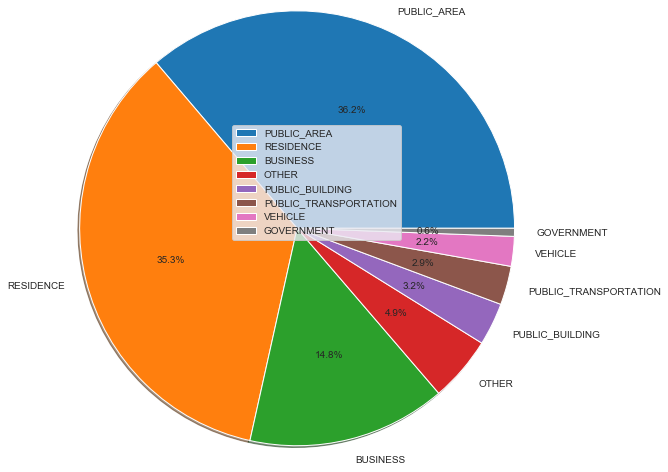

In [47]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.loc_grouped.value_counts(),labels=crimes_data_2018.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

From the above plot we can see that a lot of crimes happenen in pulic places and residence.Almost 60% of the incidents happened in these places.
Public transportation and Government places had very less crimes, so we can deploy more forces in resedential areas to reduce the crime rate.

The below plot of the year 2019 shows a same trend as in 2018

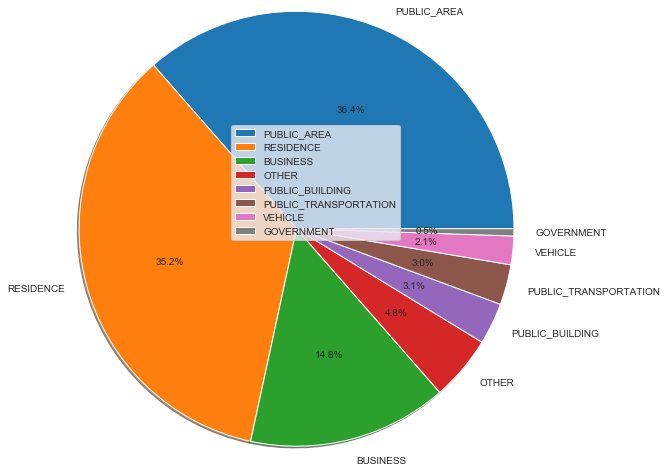

In [48]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2019.loc_grouped.value_counts(),labels=crimes_data_2019
                                       .loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

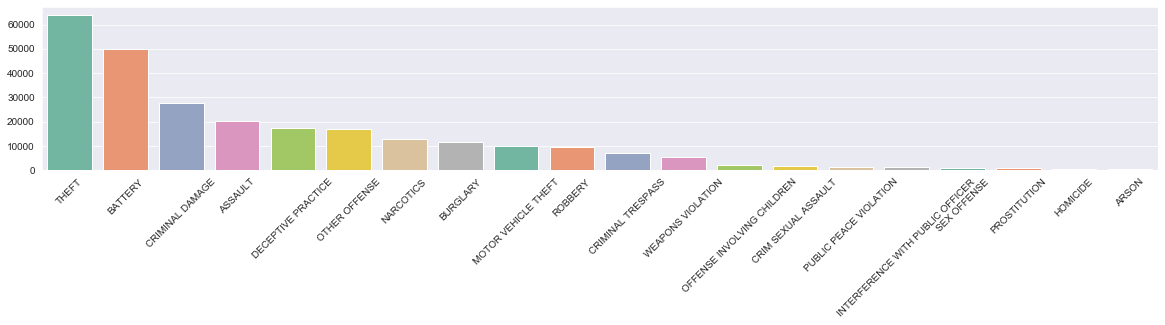

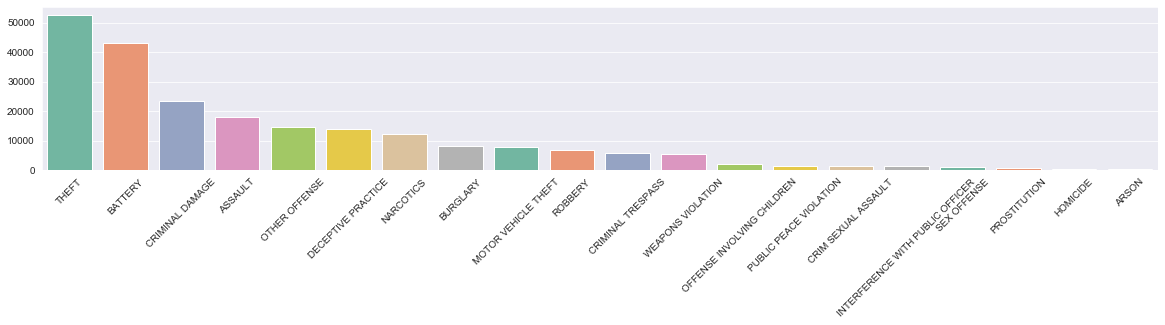

In [49]:
plt.figure(figsize=(20,3))
primary_type_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.primary_type.value_counts()[0:20].index,y=crimes_data_2018.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
primary_type_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.primary_type.value_counts()[0:20].index,y=crimes_data_2019.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

We see from the above plots that there were a lot of THEFT and BATTERY related crimes that happened over the last two years.

From the below plot we can see that the East side of the city experienced fewer crimes. South Side had the greatest number of crimes.? Reason. Has to be found out. Is it because of the type of citizens? Or are there more beats in the east zone compared to south zone

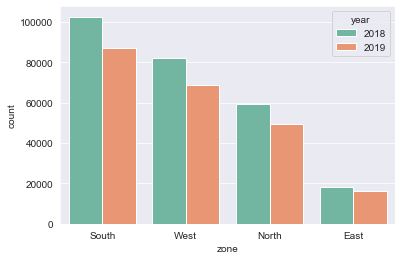

In [50]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

We can see from the below plot that a lot of crimes happening in Summer and Spring, where the weather conditions are favourable. There are very less crimes comparably in Winters

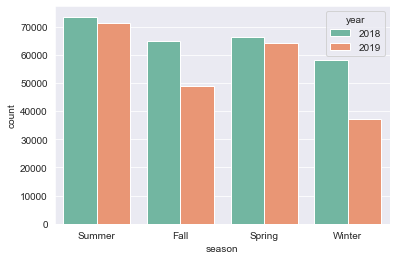

In [51]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

As we see from the below plot,there were a lot of criminals who were not arrested for the crime. The same trend has continued for 2019 as well. Almost 75% of the criminals went un-arrested for their crime in 2018.

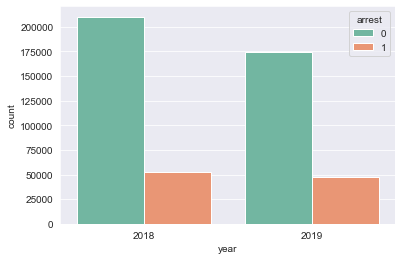

In [52]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

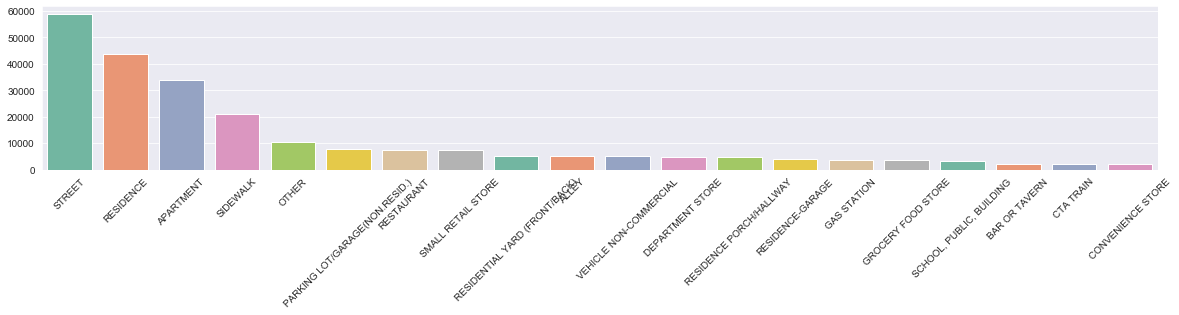

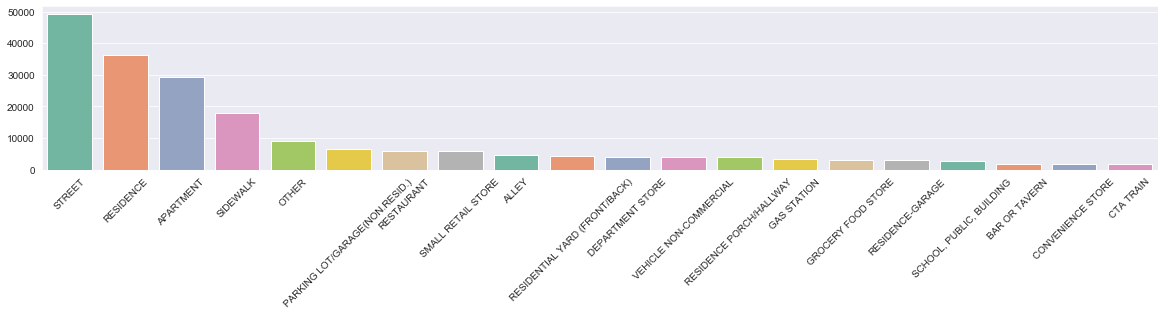

In [53]:
plt.figure(figsize=(20,3))
location_description_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.location_description.value_counts()[0:20].index,y=crimes_data_2018.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)
plt.figure(figsize=(20,3))
location_description_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.location_description.value_counts()[0:20].index,y=crimes_data_2019.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

By Looking at the two plots for the years 2018 and 2019 for the location of crime, we can see that the trend continues, A lot of street and Residential crimes are happening in the city. The trend slowly fades out.

# Complete Data 

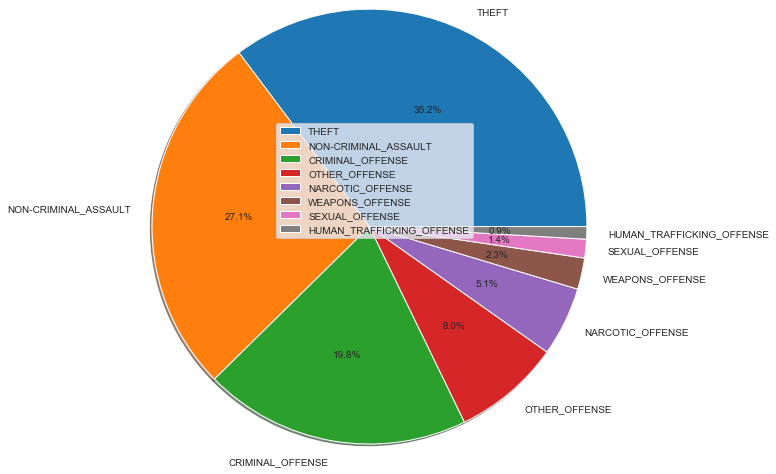

In [54]:
crimes_data_primary_type_pie = plt.pie(crimes_data.primary_type_grouped.value_counts(),labels=crimes_data.primary_type_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

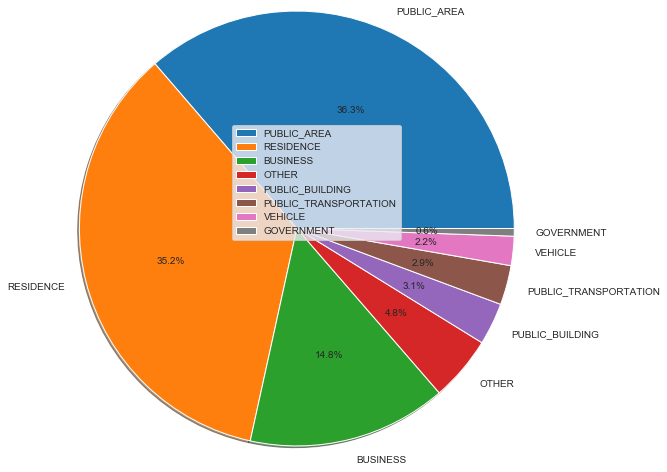

In [55]:
crimes_data_primary_type_pie = plt.pie(crimes_data.loc_grouped.value_counts(),labels=crimes_data.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

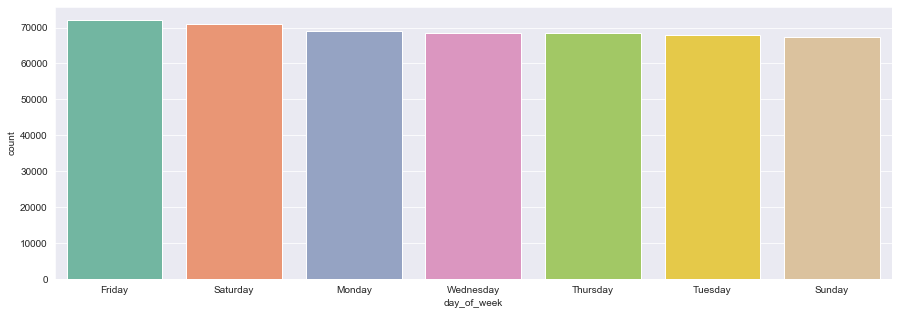

In [56]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

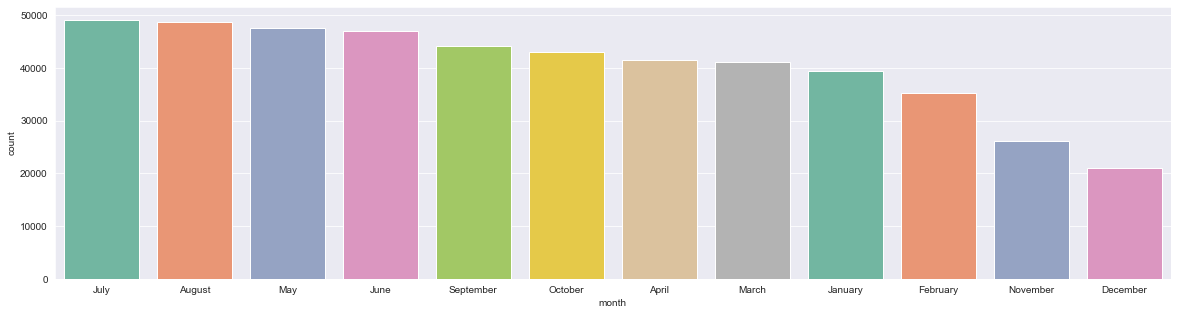

In [57]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',order=crimes_data.month.value_counts().index,palette='Set2')

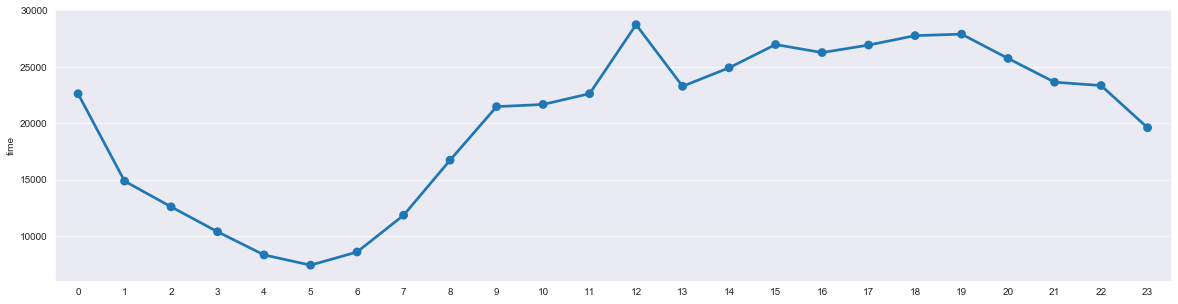

In [58]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data,x=crimes_data.time.value_counts().index,y=crimes_data.time.value_counts())

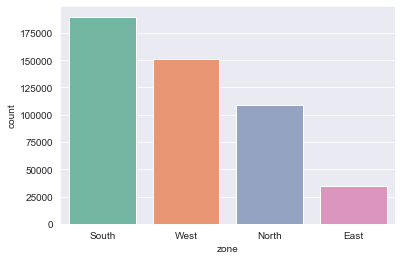

In [59]:
zone_plot = sns.countplot(data=crimes_data,x='zone',order=crimes_data.zone.value_counts().index,palette='Set2')

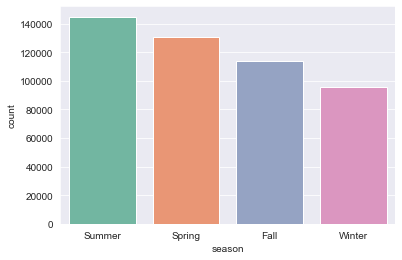

In [60]:
zone_plot = sns.countplot(data=crimes_data,x='season',order=crimes_data.season.value_counts().index,palette='Set2')

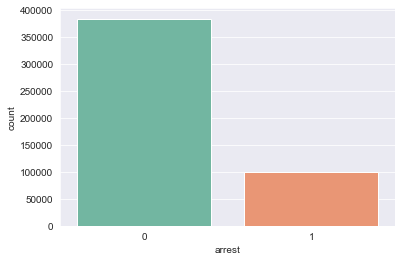

In [61]:
arrest_plot = sns.countplot(data=crimes_data,x='arrest',palette='Set2')

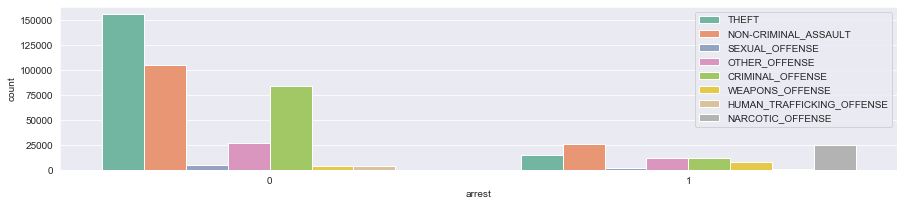

In [62]:
plt.figure(figsize=(15,3))
arrest_plot = sns.countplot(data=crimes_data,x='arrest',hue='primary_type_grouped',palette='Set2')
plt.legend(loc = 'best')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

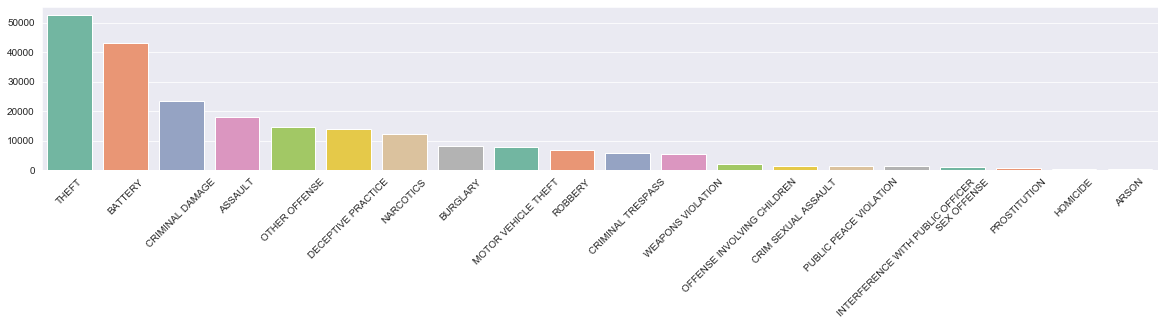

In [63]:
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(data=crimes_data,x=crimes_data.primary_type.value_counts()[0:20].index,y=crimes_data_2019.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

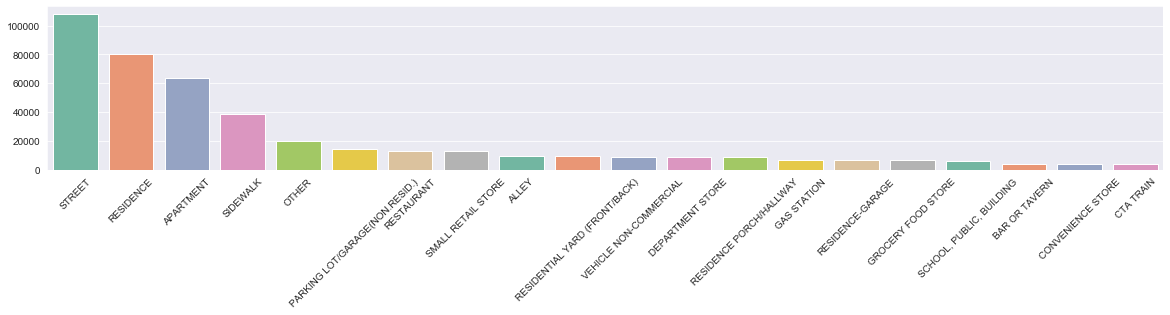

In [64]:
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(data=crimes_data,x=crimes_data.location_description.value_counts()[0:20].index,y=crimes_data.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

Text(0.5, 1, 'Crimes by District')

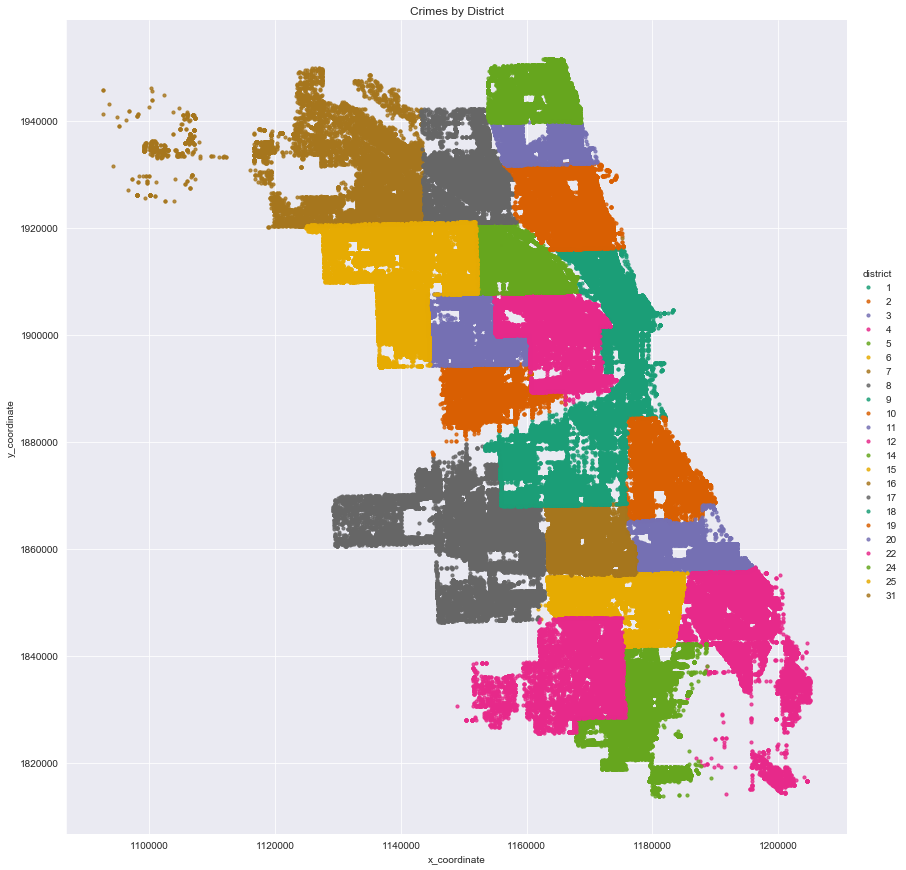

In [65]:
# A full Chicago crime by district. Maybe helpful for later when comparing our clusters

new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="district",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1, 'Crimes by Type of crime')

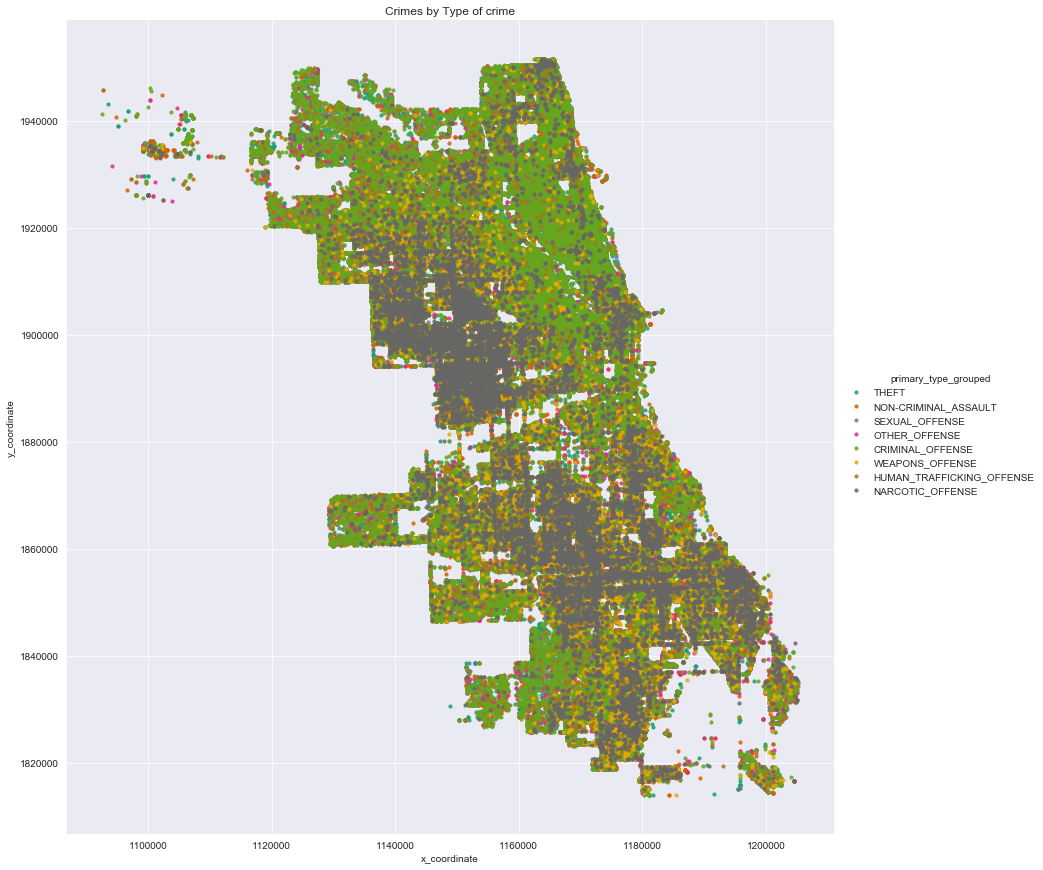

In [56]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="primary_type_grouped",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

In [66]:
#Converting the numercial attributes to categorical attributes
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [67]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [68]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,1,0,2521,25,31.0,20.0,2018,41.937823,-87.740668,Thursday,August,12,THEFT,North,Summer,RESIDENCE
1,0,0,1523,15,37.0,25.0,2018,41.886327,-87.761754,Thursday,July,15,THEFT,North,Summer,RESIDENCE
2,1,0,1821,18,27.0,8.0,2018,41.908431,-87.638510,Monday,October,18,NON-CRIMINAL_ASSAULT,North,Fall,RESIDENCE
3,1,0,113,1,42.0,32.0,2018,41.877004,-87.624732,Thursday,August,17,NON-CRIMINAL_ASSAULT,East,Summer,PUBLIC_AREA
4,1,0,1834,18,42.0,8.0,2018,41.893428,-87.619228,Sunday,April,3,SEXUAL_OFFENSE,East,Spring,RESIDENCE


In [69]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484234 entries, 0 to 484233
Data columns (total 16 columns):
arrest                  484234 non-null category
domestic                484234 non-null category
beat                    484234 non-null category
district                484234 non-null category
ward                    484234 non-null category
community_area          484234 non-null category
year                    484234 non-null category
latitude                484234 non-null float64
longitude               484234 non-null float64
day_of_week             484234 non-null object
month                   484234 non-null object
time                    484234 non-null category
primary_type_grouped    484234 non-null object
zone                    484234 non-null object
season                  484234 non-null object
loc_grouped             484184 non-null object
dtypes: category(8), float64(2), object(6)
memory usage: 33.7+ MB


In [70]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [71]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.937823,-87.740668,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,41.886327,-87.761754,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41.908431,-87.638510,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41.877004,-87.624732,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,41.893428,-87.619228,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [72]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.3, random_state=42)

In [73]:
# X = pd.concat([X_train, y_train], axis=1)
# not_arrest = X[X.arrest_1==0]
# arrest = X[X.arrest_1==1]
# arrest_oversample = resample(arrest,replace=True,n_samples=len(not_arrest),random_state=42)
# oversampled = pd.concat([not_arrest, arrest_oversample])
# print(oversampled.arrest_1.value_counts())
# y_train = oversampled.arrest_1
# X_train = oversampled.drop('arrest_1', axis=1)

In [74]:
# sm = SMOTE(random_state=42, ratio=1.0)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [75]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [76]:
#Gaussain Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[55843 59336]
 [ 7343 22749]]


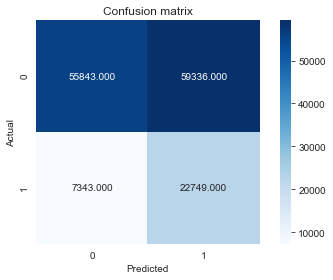

In [79]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [80]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5410026777539908
Error =  0.4589973222460092
Precision =  0.2771395504659804
Recall =  0.7559816562541539
F-1 Score =  0.40559116396409245
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.48      0.63    115179
           1       0.28      0.76      0.41     30092

    accuracy                           0.54    145271
   macro avg       0.58      0.62      0.52    145271
weighted avg       0.76      0.54      0.58    145271



In [81]:
#3 Nearest Neighbour classification
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[107761   7418]
 [ 20115   9977]]


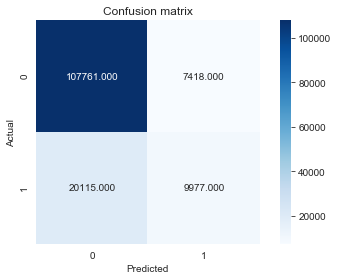

In [84]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [85]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.810471463678229
Error =  0.18952853632177102
Precision =  0.573555619430871
Recall =  0.33154991359829855
F-1 Score =  0.4201992124160297
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89    115179
           1       0.57      0.33      0.42     30092

    accuracy                           0.81    145271
   macro avg       0.71      0.63      0.65    145271
weighted avg       0.79      0.81      0.79    145271



In [86]:
#Decision tree with Entropy as attribute measure
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [87]:
y_pred = model.predict(X_test)

In [88]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[100834  14345]
 [ 13680  16412]]


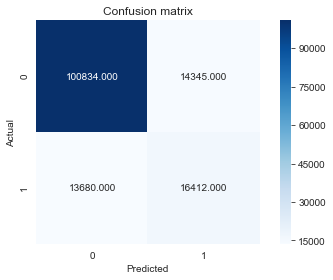

In [89]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [90]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8070846899931852
Error =  0.19291531000681483
Precision =  0.5336021068374679
Recall =  0.5453941246843015
F-1 Score =  0.5394336800933458
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88    115179
           1       0.53      0.55      0.54     30092

    accuracy                           0.81    145271
   macro avg       0.71      0.71      0.71    145271
weighted avg       0.81      0.81      0.81    145271



In [91]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [92]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [93]:
y_pred = model.predict(X_test)

In [94]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[112552   2627]
 [ 16999  13093]]


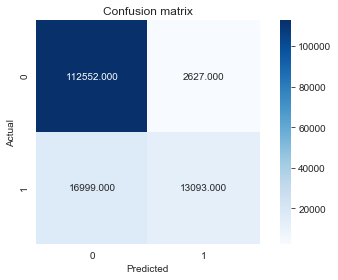

In [95]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [96]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.86490077166124
Error =  0.13509922833875998
Precision =  0.8328880407124682
Recall =  0.43509902964242986
F-1 Score =  0.5715969614948049
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92    115179
           1       0.83      0.44      0.57     30092

    accuracy                           0.86    145271
   macro avg       0.85      0.71      0.75    145271
weighted avg       0.86      0.86      0.85    145271



In [97]:
#Logistic Regression
classifier = LogisticRegression(random_state=42)

In [98]:
classifier.fit(X_train,y_train)

/Users/akarshb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[113438   1741]
 [ 19704  10388]]


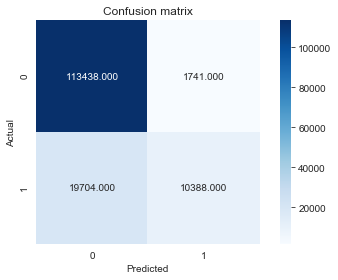

In [101]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [102]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8523793461874704
Error =  0.14762065381252965
Precision =  0.8564597246269272
Recall =  0.34520802871195
F-1 Score =  0.49207740224059116
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.98      0.91    115179
           1       0.86      0.35      0.49     30092

    accuracy                           0.85    145271
   macro avg       0.85      0.67      0.70    145271
weighted avg       0.85      0.85      0.83    145271



In [103]:
crimes_data_type = crimes_data.loc[crimes_data.primary_type_grouped.isin(['THEFT','NON-CRIMINAL_ASSAULT','CRIMINAL_OFFENSE'])]
crimes_data_prediction = crimes_data_type.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate','primary_type_grouped'],axis=1)
crimes_data_prediction_type = crimes_data_type.primary_type_grouped
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [104]:
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,...,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.937823,-87.740668,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,41.886327,-87.761754,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41.908431,-87.638510,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41.877004,-87.624732,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8,41.765039,-87.576275,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [105]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction,crimes_data_prediction_type, test_size=0.3, random_state=42)

In [106]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [107]:
#3 Nearest Neighbour Classification for Type of crime
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10781  5960 12091]
 [12588 14130 12742]
 [16264  8746 26109]]


In [110]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.42726381991608814
Error =  0.5727361800839119
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.27      0.37      0.31     28832
NON-CRIMINAL_ASSAULT       0.49      0.36      0.41     39460
               THEFT       0.51      0.51      0.51     51119

            accuracy                           0.43    119411
           macro avg       0.42      0.41      0.41    119411
        weighted avg       0.45      0.43      0.43    119411



In [111]:
#Decision tree classifier for type of crime
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [112]:
y_pred = model.predict(X_test)

In [113]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 9567  7320 11945]
 [ 7428 21669 10363]
 [12561 10498 28060]]


In [114]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.49657066769393104
Error =  0.503429332306069
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.32      0.33      0.33     28832
NON-CRIMINAL_ASSAULT       0.55      0.55      0.55     39460
               THEFT       0.56      0.55      0.55     51119

            accuracy                           0.50    119411
           macro avg       0.48      0.48      0.48    119411
        weighted avg       0.50      0.50      0.50    119411



In [115]:
#Random Forest classifier for type of crime
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [116]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [117]:
y_pred = model.predict(X_test)

In [118]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 8303  6691 13838]
 [ 5171 23709 10580]
 [ 9917  8610 32592]]


In [119]:
#Classification Metrics
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5410221838859066
Error =  0.4589778161140934
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.35      0.29      0.32     28832
NON-CRIMINAL_ASSAULT       0.61      0.60      0.60     39460
               THEFT       0.57      0.64      0.60     51119

            accuracy                           0.54    119411
           macro avg       0.51      0.51      0.51    119411
        weighted avg       0.53      0.54      0.53    119411



In [120]:
#Logistic Regression for predicting the type of crime -Best
classifier = LogisticRegression(random_state=42)

In [121]:
classifier.fit(X_train,y_train)

/Users/akarshb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akarshb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 3101  4480 21251]
 [ 1627 21441 16392]
 [ 2707  3533 44879]]


In [124]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.5813618510857459
Error =  0.4186381489142541
Classification Report
                       precision    recall  f1-score   support

    CRIMINAL_OFFENSE       0.42      0.11      0.17     28832
NON-CRIMINAL_ASSAULT       0.73      0.54      0.62     39460
               THEFT       0.54      0.88      0.67     51119

            accuracy                           0.58    119411
           macro avg       0.56      0.51      0.49    119411
        weighted avg       0.57      0.58      0.53    119411



In [47]:
# Calculated the number of occrurances for each type of crime category in each district
district_crime_rates = pd.DataFrame(columns=['theft_count', 'assault_count', 'sexual_offense_count', 
                                             'weapons_offense_count', 'criminal_offense_count', 
                                             'human_trafficking_count', 'narcotic_offense_count', 
                                             'other_offense_count'])
district_crime_rates = district_crime_rates.astype(int) 

for i in range(1, 32):   
    temp_district_df = crimes_data[crimes_data['district'] == i] 

    temp_district_theft = temp_district_df[temp_district_df['primary_type_grouped'] == 'THEFT'] 
    num_theft = temp_district_theft.primary_type_grouped.count() 
    
    temp_district_assault = temp_district_df[temp_district_df['primary_type_grouped'] == 'NON-CRIMINAL_ASSAULT'] 
    num_assault = temp_district_assault.primary_type_grouped.count()    
    
    temp_district_sexual_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'SEXUAL_OFFENSE'] 
    num_sexual_offense = temp_district_sexual_offense.primary_type_grouped.count()
    
    temp_district_weapons_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'WEAPONS_OFFENSE'] 
    num_weapons_offense = temp_district_weapons_offense.primary_type_grouped.count()
    
    temp_district_criminal_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'CRIMINAL_OFFENSE'] 
    num_criminal_offense = temp_district_criminal_offense.primary_type_grouped.count()
    
    temp_district_human_trafficking = temp_district_df[temp_district_df['primary_type_grouped'] == 'HUMAN_TRAFFICKING_OFFENSE'] 
    num_human_trafficking = temp_district_human_trafficking.primary_type_grouped.count()
    
    temp_district_narcotic_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'NARCOTIC_OFFENSE'] 
    num_narcotic_offense = temp_district_narcotic_offense.primary_type_grouped.count()
    
    temp_district_other_offense = temp_district_df[temp_district_df['primary_type_grouped'] == 'OTHER_OFFENSE'] 
    num_other_offense = temp_district_other_offense.primary_type_grouped.count()

    district_crime_rates.loc[i] = [num_theft, num_assault, num_sexual_offense, num_weapons_offense, num_criminal_offense, num_human_trafficking, num_narcotic_offense, num_other_offense]    
    
#district_crime_rates.head()
    

In [48]:
# Standardize the data
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)
#district_crime_rates_standardized.head()

In [49]:
# Clustering with K-Means 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans1)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))
#kmeans_mean_cluster

#district_crime_rates.head()

In [50]:
# Clustering with DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 3, metric = "euclidean").fit(district_crime_rates_standardized)

# Show clusters
dbscan_clusters = clustering.labels_
# print(clusters)

district_crime_rates['dbscan_clusters'] = dbscan_clusters + 2
#district_crime_rates.head()

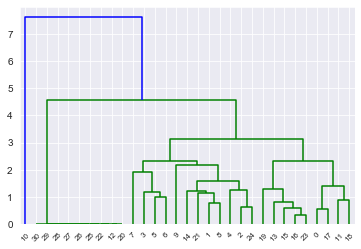

In [51]:
# Clustering with Hierarchical Clustering with average linkage
clustering = linkage(district_crime_rates_standardized, method = "average", metric = "euclidean")

# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

# Form clusters
hierarchical_clusters = fcluster(clustering, 4, criterion = 'maxclust')
# print(clusters)

district_crime_rates['hierarchical_clusters'] = hierarchical_clusters 
#district_crime_rates.head()

In [52]:
# Add 'district' column
district_crime_rates['district'] = district_crime_rates.index
district_crime_rates = district_crime_rates[['district', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters', 'theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count']]

In [53]:
# Remove all columns but 'district' & each method's cluster
district_crime_rates = district_crime_rates.drop(['theft_count', 'assault_count', 'sexual_offense_count', 'weapons_offense_count', 'criminal_offense_count', 'human_trafficking_count', 'narcotic_offense_count', 'other_offense_count'], axis=1)
district_crime_rates.head(31)

,district,kmeans_cluster,dbscan_clusters,hierarchical_clusters
1,1,1,1,3
2,2,1,1,2
3,3,2,1,2
4,4,2,1,2
5,5,2,1,2
6,6,2,1,2
7,7,2,1,2
8,8,2,1,2
9,9,2,1,2
10,10,2,1,2


In [54]:
# Merge each district's clusters for each method into a single dataframe 
crimes_data_clustered = pd.merge(crimes_data, district_crime_rates, on='district', how='inner')
#crimes_data.head()

Text(0.5, 1, 'KMeans Clustering of Crimes by District')

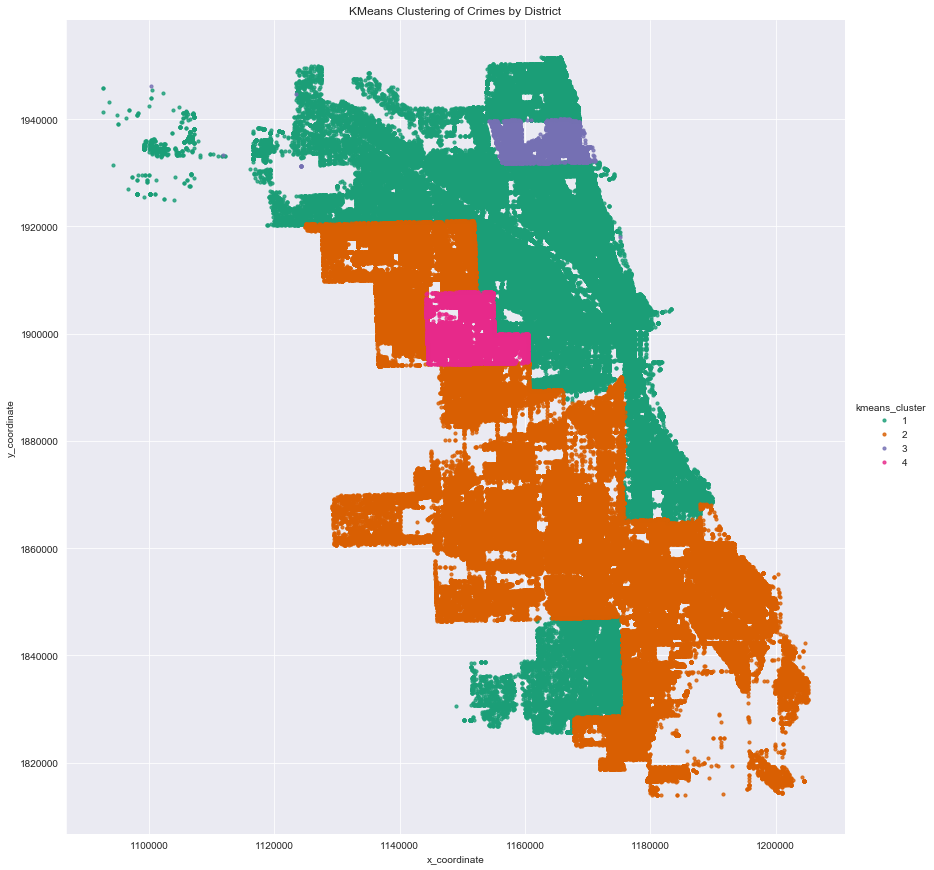

In [55]:
# Crime level clusters by district (KMeans Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="kmeans_cluster",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("KMeans Clustering of Crimes by District")

Text(0.5, 1, 'DBScan Clustering of Crimes by District')

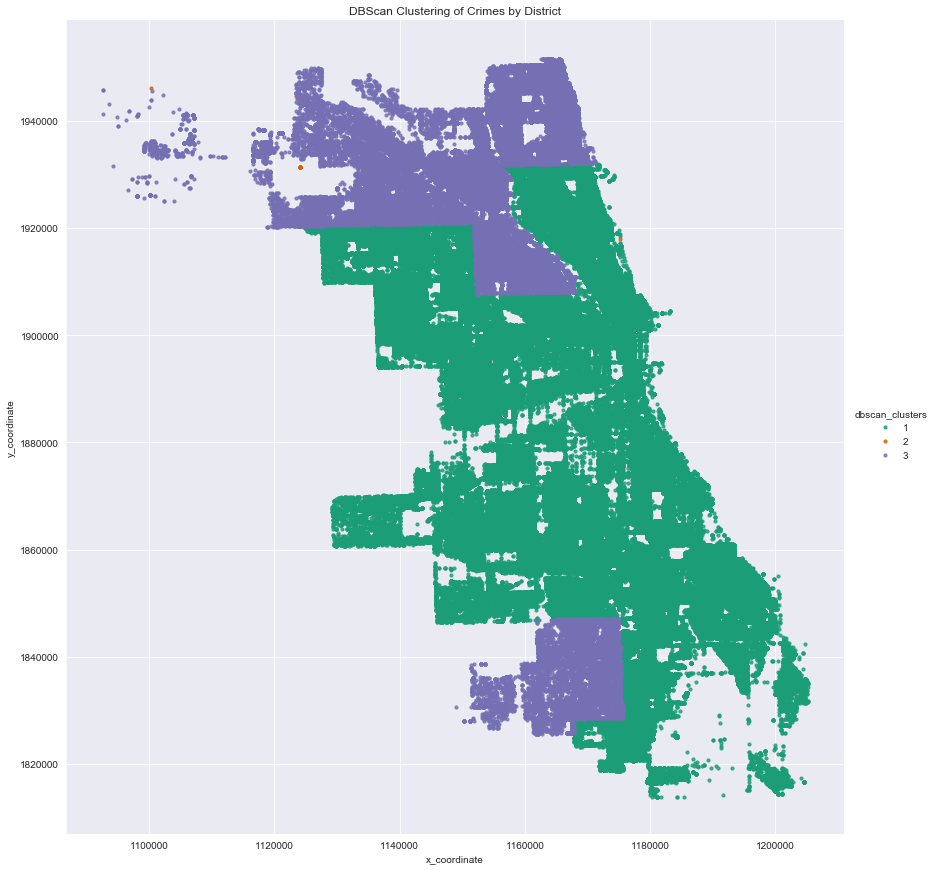

In [56]:
# Crime level clusters by district (DBScan Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="dbscan_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("DBScan Clustering of Crimes by District")

Text(0.5, 1, 'Hierarchical Clustering of Crimes by District')

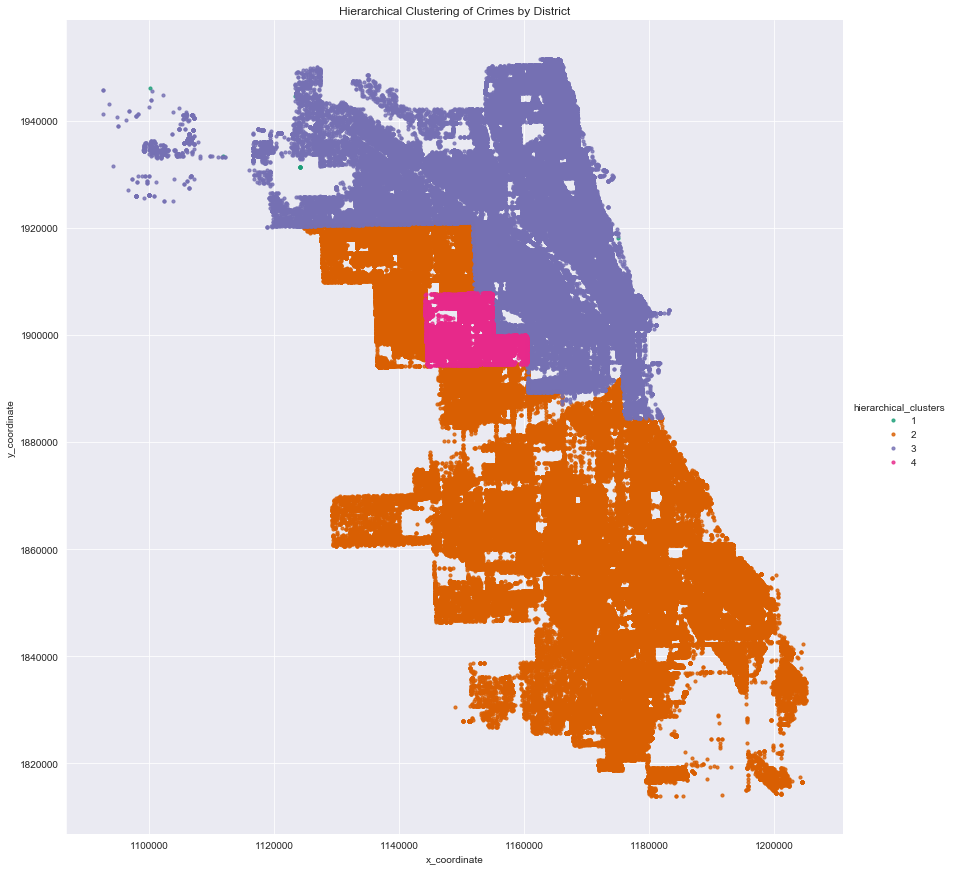

In [57]:
# Crime level clusters by district (Hierarchical Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="hierarchical_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Hierarchical Clustering of Crimes by District")